In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import keras
from keras.layers import Input,Dense,Flatten,Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory
from keras import models
from keras import Model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# create genrators
train = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)
valid = ImageDataGenerator(rescale=1./255)

# Generators

In [12]:
traing=train.flow_from_directory('/kaggle/input/fruits-classification/Fruits Classification/train',target_size=(227,227),class_mode="sparse",batch_size=32)
testg=test.flow_from_directory('/kaggle/input/fruits-classification/Fruits Classification/test',target_size=(227,227),class_mode="sparse",batch_size=32)

validg=valid.flow_from_directory('/kaggle/input/fruits-classification/Fruits Classification/valid',target_size=(227,227),class_mode="sparse",batch_size=32)


Found 9700 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


# Alex net Architecture model building

In [8]:
import cv2

In [9]:
img = cv2.imread("/kaggle/input/fruits-classification/Fruits Classification/train/Apple/Apple (1).jpeg")

In [10]:
img.shape

(147, 120, 3)

In [13]:
# alex net architecture  (Functional api)
inputs = Input(shape=(227,227,3))
x =  Conv2D(96,(11,11),strides=4,padding="valid",activation="relu")(inputs)
x = MaxPooling2D(pool_size=(3,3),strides=2,padding="valid")(x)


x =  Conv2D(256,(5,5),strides=1,padding="same",activation="relu")(x)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid")(x)


x =  Conv2D(384,(3,3),strides=1,padding="same",activation="relu")(x)

x =  Conv2D(384,(3,3),strides=1,padding="same",activation="relu")(x)

x =  Conv2D(256,(3,3),strides=1,padding="same",activation="relu")(x)

x = MaxPooling2D(pool_size=(3,3),strides=2,padding="valid")(x)

# flatten layer
x = Flatten()(x)

# dense layer
x = Dense(4096,activation="relu")(x)
x = Dense(4096,activation="relu")(x)
output = Dense(5,activation="softmax")(x)

model_1 = Model(inputs=inputs,outputs=output)






In [14]:
# summary of the model
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120

In [16]:
# compiling the model

model_1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [20]:
history = model_1.fit(traing,epochs=10,steps_per_epoch=9700//32,validation_data=validg,validation_steps=200//32)


Epoch 1/10
303/303 [==============================] - 19s 63ms/step - loss: 37.6422 - accuracy: 0.2045 - val_loss: 1.6155 - val_accuracy: 0.1979
Epoch 2/10
303/303 [==============================] - 20s 65ms/step - loss: 84.3074 - accuracy: 0.1914 - val_loss: 1.6095 - val_accuracy: 0.2031
Epoch 3/10
303/303 [==============================] - 18s 60ms/step - loss: 31.5464 - accuracy: 0.1998 - val_loss: 1.6097 - val_accuracy: 0.2031
Epoch 4/10
303/303 [==============================] - 19s 63ms/step - loss: 35.7729 - accuracy: 0.1901 - val_loss: 1.6097 - val_accuracy: 0.1979
Epoch 5/10
303/303 [==============================] - 20s 65ms/step - loss: 67.1001 - accuracy: 0.1951 - val_loss: 1.6095 - val_accuracy: 0.1875
Epoch 6/10
303/303 [==============================] - 19s 62ms/step - loss: 4.0910 - accuracy: 0.1991 - val_loss: 1.6095 - val_accuracy: 0.1979
Epoch 7/10
303/303 [==============================] - 19s 61ms/step - loss: 5.5349 - accuracy: 0.1959 - val_loss: 1.6098 - val_accu

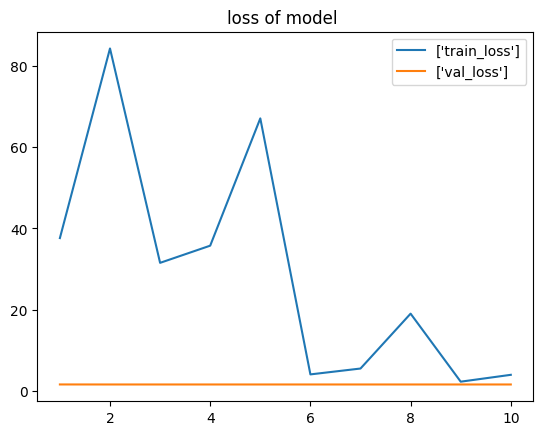

In [22]:
#  checking the underfitting and overfitting
import matplotlib.pyplot as plt

plt.plot(range(1,11),history.history['loss'],label=['train_loss'])

plt.plot(range(1,11),history.history['val_loss'],label=['val_loss'])
plt.title("loss of model ")


plt.legend()


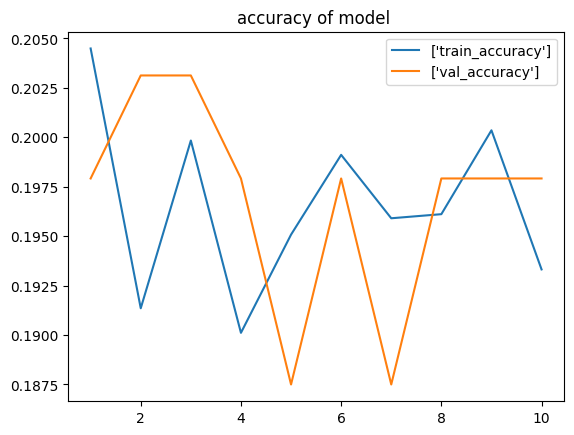

In [23]:
# accuracy
plt.plot(range(1,11),history.history['accuracy'],label=['train_accuracy'])

plt.plot(range(1,11),history.history['val_accuracy'],label=['val_accuracy'])
plt.title("accuracy of model ")


plt.legend()

In [24]:
# prediction on test data
predicted_yi = model_1.predict(testg)

# accessing the high probability value
final_predicted_yi = np.argmax(predicted_yi,axis=1)


4/4 [==============================] - 1s 199ms/step


In [25]:
testg.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [32]:
# evalution of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
accuracy_score(testg.labels,final_predicted_yi)

0.2

Text(0.5, 1.0, 'Confusion matrix of fruits classification')

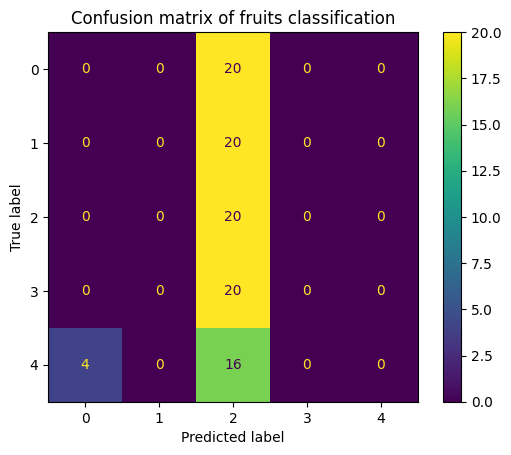

In [38]:
# classification report
import sklearn
cm = confusion_matrix(testg.labels,final_predicted_yi)

pa = sklearn.metrics.ConfusionMatrixDisplay(cm)

pa.plot()
plt.title("Confusion matrix of fruits classification")

In [39]:
# prediction on validation data
predicted_yi_valid = model_1.predict(validg)

# accessing the high probability value
final_predicted_yivalid = np.argmax(predicted_yi_valid,axis=1)


7/7 [==============================] - 1s 77ms/step


In [41]:
# validation data accuracy
accuracy_score(validg.labels,final_predicted_yivalid)

0.2

In [44]:
# prediction on train data
predicted_yi_train = model_1.predict(traing)

# accessing the high probability value
final_predicted_yi_train = np.argmax(predicted_yi_train,axis=1)


304/304 [==============================] - 25s 83ms/step


In [53]:
# train score
accuracy_score(traing.labels,final_predicted_yi_train)

0.2